In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Select index Component and import data

In [2]:
#Load Stock listing Data
nyse = pd.read_excel('listings.xlsx',sheet_name='nyse',na_values='n/a')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Load and Prepare listing data
nyse.set_index('Stock Symbol',inplace= True)
nyse.dropna(subset=['Sector'],inplace=True)
nyse['Market Capitalization']/= 1e6   #in Million USD

In [4]:
nyse.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1647.165276,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,112736.642168,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.312876,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5225.238185,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,134.735089,NaN,Consumer Services,Newspapers/Magazines


In [5]:
#Select Index Components
components= nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending=False)

Sector                 Stock Symbol
Health Care            JNJ             338834.390080
Energy                 XOM             338728.713874
Finance                JPM             300283.250479
Miscellaneous          BABA            275525.000000
Public Utilities       T               247339.517272
Basic Industries       PG              230159.644117
Consumer Services      WMT             221864.614129
Consumer Non-Durables  KO              183655.305119
Technology             ORCL            181046.096000
Capital Goods          TM              155660.252483
Transportation         UPS              90180.886756
Consumer Durables      ABB              48398.935676
Name: Market Capitalization, dtype: float64

In [6]:
#import and prepare listing data
tickers =components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [7]:
tickers.to_list()

['PG',
 'TM',
 'ABB',
 'KO',
 'WMT',
 'XOM',
 'JPM',
 'JNJ',
 'BABA',
 'T',
 'ORCL',
 'UPS']

In [8]:
#Stock Index Components
columns= ['Company Name','Market Capitalization','Last Sale']
component_info = nyse.loc[tickers,columns]
pd.options.display.float_format = '{:2f}'.format
component_info.head()

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),230159.644117,90.030000
TM,Toyota Motor Corp Ltd Ord,155660.252483,104.180000
ABB,ABB Ltd,48398.935676,22.630000
KO,Coca-Cola Company (The),183655.305119,42.790000
WMT,"Wal-Mart Stores, Inc.",221864.614129,73.150000


In [9]:
#Import and prepare listing data
data= pd.read_csv('stock_data.csv',parse_dates=['Date'],index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


#Building a Value Weighted Index

In [10]:
component_info

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
PG,Procter & Gamble Company (The),230159.644117,90.030000
TM,Toyota Motor Corp Ltd Ord,155660.252483,104.180000
ABB,ABB Ltd,48398.935676,22.630000
KO,Coca-Cola Company (The),183655.305119,42.790000
WMT,"Wal-Mart Stores, Inc.",221864.614129,73.150000
XOM,Exxon Mobil Corporation,338728.713874,81.690000
JPM,J P Morgan Chase & Co,300283.250479,84.400000
JNJ,Johnson & Johnson,338834.390080,124.990000
BABA,Alibaba Group Holding Limited,275525.000000,110.210000


In [11]:
#Number of Shares outstanding
shares= component_info['Market Capitalization'].div(component_info['Last Sale'])
shares

Stock Symbol
PG     2556.477220
TM     1494.147173
ABB    2138.706835
KO     4292.014609
WMT    3033.009079
XOM    4146.513819
JPM    3557.858418
JNJ    2710.891992
BABA   2500.000000
T      6140.504401
ORCL   4114.684000
UPS     869.297154
dtype: float64

In [12]:
#Historical Stock Price
market_cap_series= data.mul(shares)
market_cap_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    0 non-null      float64
 1   ABB     0 non-null      float64
 2   AMGN    0 non-null      float64
 3   AMZN    0 non-null      float64
 4   BABA    0 non-null      float64
 5   CPRT    0 non-null      float64
 6   EL      0 non-null      float64
 7   GS      0 non-null      float64
 8   ILMN    0 non-null      float64
 9   JNJ     0 non-null      float64
 10  JPM     0 non-null      float64
 11  KO      0 non-null      float64
 12  MA      0 non-null      float64
 13  ORCL    0 non-null      float64
 14  PAA     0 non-null      float64
 15  PG      0 non-null      float64
 16  RIO     0 non-null      float64
 17  T       0 non-null      float64
 18  TEF     0 non-null      float64
 19  TM      0 non-null      float64
 20  UPS     1762 non-null   float64
 21  WMT     0 non-null 

In [13]:
market_cap_series.first('D').append(market_cap_series.last('D'))

,AAPL,ABB,AMGN,AMZN,BABA,CPRT,EL,GS,ILMN,JNJ,...,ORCL,PAA,PG,RIO,T,TEF,TM,UPS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50575.708420,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99656.225735,NaN,NaN


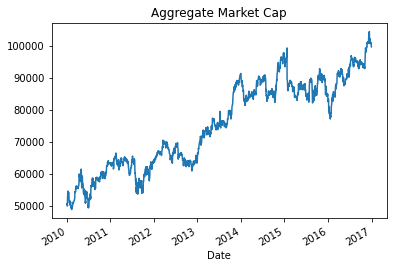

In [14]:
#Aggregate Market Value per Period
agg_mcap= market_cap_series.sum(axis=1) #Total Market Cap
agg_mcap.plot(title='Aggregate Market Cap')


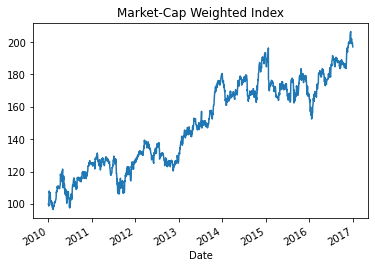

In [15]:
#Value-Based Index
index= agg_mcap.div(agg_mcap.iloc[0]).mul(100) #Divide by 1st value
index.plot(title= 'Market-Cap Weighted Index')

#Evaluate Index Performance

In [16]:
#Value Contribution by Stock
agg_mcap.iloc[-1]-agg_mcap.iloc[0]

49080.517314840006

In [17]:
change= market_cap_series.first('D').append(market_cap_series.last('D'))
change.diff().iloc[-1].sort_values()

UPS    49080.517315
AAPL            NaN
ABB             NaN
AMGN            NaN
AMZN            NaN
BABA            NaN
CPRT            NaN
EL              NaN
GS              NaN
ILMN            NaN
JNJ             NaN
JPM             NaN
KO              NaN
MA              NaN
ORCL            NaN
PAA             NaN
PG              NaN
RIO             NaN
T               NaN
TEF             NaN
TM              NaN
WMT             NaN
XOM             NaN
Name: 2016-12-30 00:00:00, dtype: float64

In [18]:
#market cap value weighted
market_cap= component_info['Market Capitalization']
weights= market_cap.div(market_cap.sum())
weights.sort_values().mul(100)

Stock Symbol
ABB     1.853175
UPS     3.452988
TM      5.960166
ORCL    6.932179
KO      7.032084
WMT     8.495103
PG      8.812716
T       9.470526
BABA   10.549736
JPM    11.497720
XOM    12.969780
JNJ    12.973826
Name: Market Capitalization, dtype: float64

In [19]:
#Value weighted Component Return
index_return= (index.iloc[-1]/index.iloc[0]-1)*100
index_return

97.04365761430044

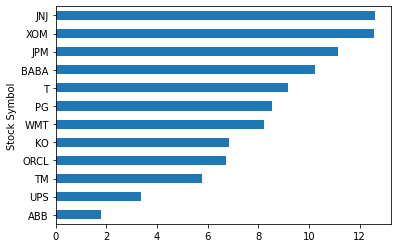

In [20]:
weighted_returns =weights.mul(index_return)
weighted_returns.sort_values().plot(kind= 'barh')

In [28]:
#performance Vs Banchmark
data= index.to_frame('Index')
data['SP500']= pd.read_csv('sp500.csv',parse_dates=['date'],index_col='date')
data.SP500=data.SP500.div(data.SP500.iloc[0], axis=0).mul(100)
data

,Index,SP500
Date,,
2010-01-04,100.000000,100.000000
2010-01-05,100.171880,100.311565
2010-01-06,99.432795,100.366287
2010-01-07,98.676521,100.767880
2010-01-08,103.420419,101.058262
...,...,...
2016-12-23,199.329667,199.806706
2016-12-27,199.604675,200.255960
2016-12-28,198.006188,198.582512


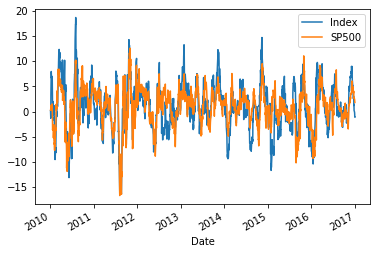

In [22]:
#performance vs banchmark:30D rolling return
def multi_period_return(r):
  return (np.prod(r+1)-1)*100
data.pct_change().rolling('30D').apply(multi_period_return).plot()

#Index Correlation and Exporting to Excel

In [27]:
daily_return= data.pct_change()
correlation = daily_return.corr()
correlation

,Index,SP500
Index,1.000000,0.742297
SP500,0.742297,1.000000


Text(0.5, 1.0, 'Daily Return Correlation')

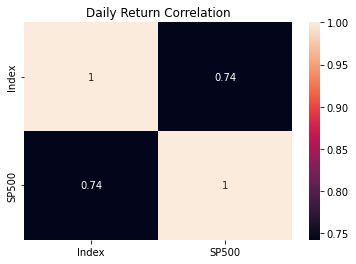

In [30]:
sns.heatmap(correlation,annot=True)
plt.title('Daily Return Correlation')

In [31]:
#saving result in Excel
correlation.to_excel(excel_writer='correlation.xls',sheet_name='Correlations',
                     startrow=1,
                     startcol=1)

<ipython-input-31-b5c479138b59>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  correlation.to_excel(excel_writer='correlation.xls',sheet_name='Correlations',
